In [ ]:
import cv2
import numpy as np

vc = cv2.VideoCapture(0)
pic_no = 0
total_pic = 1500
flag_capturing = False
path = 'C:/Users/Ahmed Khan/3D Objects/mythesiswork/data/Z'
while(vc.isOpened()):
    
    rval, frame = vc.read()
    frame = cv2.flip(frame, 1)
    
    cv2.rectangle(frame, (300,300), (100,100), (0,255,0),0)
    
    cv2.imshow("image", frame)
    
    crop_img = frame[100:300, 100:300]
    
    if flag_capturing:
        
        pic_no += 1
        save_img = cv2.resize( crop_img, (50,50) )
        save_img = np.array(save_img)
        cv2.imwrite(path + "/" + str(pic_no) + ".jpg", save_img)
        
    
    keypress = cv2.waitKey(1)
    
    if pic_no == total_pic:
        flag_capturing = False
        break
    
    if keypress == ord('q'):
        break
    elif keypress == ord('c'):
        flag_capturing = True

vc.release()
cv2.destroyAllWindows()
cv2.waitKey(1)



In [3]:
import os
import numpy as np
import cv2

path = 'C:/Users/Ahmed Khan/3D Objects/mythesiswork/data/'
path2 = 'C:/Users/Ahmed Khan/3D Objects/mythesiswork/data1/'

gestures = os.listdir(path)

print(gestures)

for ix in gestures:
    images = os.listdir(path + ix)
    os.mkdir(path2 + ix)
    for cx in images:
        img_path = path + ix +'/' + cx
        img = cv2.imread(img_path)
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(grey, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
        save_img = cv2.resize(thresh, (50,50))
        cv2.imwrite(path2 + ix + '/' + cx, save_img)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']


In [26]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

In [27]:
path = 'C:/Users/Ahmed Khan/3D Objects/mythesiswork/data1/'

In [28]:
gestures = os.listdir(path)

In [29]:
dict_labels = {
    '_':1,
    '0':2,
    '1':3,
    '2':4,
    '3':5,
    '4':6,
    '5':7,
    '6':8,
    '7':9,
    '8':10,
    '9':11,
    'A':12,
    'B':13,
    'C':14,
    'D':15,
    'E':16,
    'F':17,
    'G':18,
    'H':19,
    'I':20,
    'J':21,
    'K':22,
    'L':23,
    'M':24,
    'N':25,
    'O':26,
    'P':27,
    'Q':28,
    'R':29,
    'S':30,
    'T':31,
    'U':32,
    'V':33,
    'W':34,
    'X':35,
    'Y':36,
    'Z':37,
    
}

In [30]:
print(list(dict_labels.keys()))

['_', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [31]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [32]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)

In [33]:
categories = Y.shape[1]

In [34]:
X, Y = shuffle(X, Y, random_state=0)

In [35]:
X.shape

(55500, 50, 50, 1)

In [36]:
Y.shape

(55500, 38)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [38]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(41625, 50, 50, 1) (13875, 50, 50, 1)
(41625, 38) (13875, 38)


In [39]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [40]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [41]:
fit = model.fit(X_train, Y_train, batch_size=138, epochs=25, validation_data=[X_test, Y_test])

Train on 41625 samples, validate on 13875 samples
Epoch 1/25
41625/41625 [==============================] - 163s 4ms/step - loss: 0.4258 - acc: 0.8814 - val_loss: 0.0071 - val_acc: 0.9978
Epoch 2/25
41625/41625 [==============================] - 163s 4ms/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0015 - val_acc: 0.9996
Epoch 3/25
41625/41625 [==============================] - 158s 4ms/step - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0015 - val_acc: 0.9996
Epoch 4/25
41625/41625 [==============================] - 154s 4ms/step - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 5/25
41625/41625 [==============================] - 159s 4ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 3.9900e-04 - val_acc: 0.9999
Epoch 6/25
41625/41625 [==============================] - 162s 4ms/step - loss: 0.0063 - acc: 0.9979 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 7/25
41625/41625 [==============================] - 150s 4ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 9.686

In [50]:
model.save('CNNmodel.h5')

In [48]:
from keras.models import load_model

In [49]:
m = load_model('CNNmodel.h5')

In [42]:
y_pred = m.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [63]:
y_pred.round()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
accuracy_score(Y_test, y_pred.round())*100

100.0

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_pred.round(), Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       391
           5       1.00      1.00      1.00       377
           6       1.00      1.00      1.00       376
           7       1.00      1.00      1.00       369
           8       1.00      1.00      1.00       361
           9       1.00      1.00      1.00       382
          10       1.00      1.00      1.00       371
          11       1.00      1.00      1.00       374
          12       1.00      1.00      1.00       392
          13       1.00      1.00      1.00       401
          14       1.00      1.00      1.00       374
          15       1.00      1.00      1.00       359
          16       1.00      1.00      1.00       403
          17       1.00    

C:\Users\Ahmed Khan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed Khan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
accuracy = m.evaluate(X_test,Y_test,batch_size=138)
print("Accuracy: ",accuracy[1]*100)

13875/13875 [==============================] - 23s 2ms/step
Accuracy:  100.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

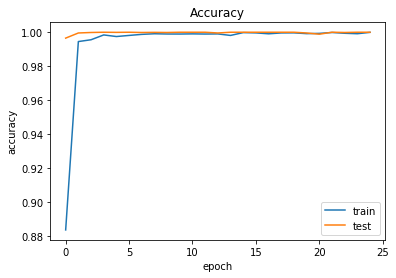

In [21]:
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

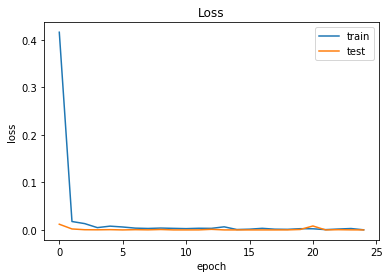

In [22]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [23]:
import cv2
import numpy as np
from keras.models import load_model

model = load_model('CNNmodel.h5')


gestures = {
    1:' ',
    2:'0',
    3:'1',
    4:'2',
    5:'3',
    6:'4',
    7:'5',
    8:'6',
    9:'7',
    10:'8',
    11:'9',
    12:'A',
    13:'B',
    14:'C',
    15:'D',
    16:'E',
    17:'F',
    18:'G',
    19:'H',
    20:'I',
    21:'J',
    22:'K',
    23:'L',
    24:'M',
    25:'N',
    26:'O',
    27:'P',
    28:'Q',
    29:'R',
    30:'S',
    31:'T',
    32:'U',
    33:'V',
    34:'W',
    35:'X',
    36:'Y',
    37:'Z',
}


def predict(gesture):
    img = cv2.resize(gesture, (50,50))
    img = img.reshape(1,50,50,1)
    img = img/255.0
    prd = model.predict(img)
    index = prd.argmax()
    return gestures[index]


vc = cv2.VideoCapture(0)
rval, frame = vc.read()
old_text = ''
pred_text = ''
count_frames = 0
total_str = ''
flag = False


while True:
    
    if frame is not None: 
        
        frame = cv2.flip(frame, 1)
        frame = cv2.resize( frame, (400,400) )
        
        cv2.rectangle(frame, (300,300), (100,100), (0,255,0), 2)
        
        crop_img = frame[100:300, 100:300]
        grey = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
        
        thresh = cv2.threshold(grey,210,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
      
        
        blackboard = np.zeros(frame.shape, dtype=np.uint8)
        cv2.putText(blackboard, "Predicted text : ", (20, 40), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 0))
        if count_frames > 50 and pred_text != "":
            total_str += pred_text
            count_frames = 0
            
        if flag == True:
            old_text = pred_text
            pred_text = predict(thresh)
        
            if old_text == pred_text:
                count_frames += 1
            else:
                count_frames = 0
            cv2.putText(blackboard, total_str, (20, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 127))
        res = np.hstack((frame, blackboard))
        
        cv2.imshow("image", res)
        cv2.imshow("hand", thresh)
        
    rval, frame = vc.read()
    keypress = cv2.waitKey(1)
    if keypress == ord('c'):
        flag = True
    if keypress == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

vc.release()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [31]:
import glob
import PIL
import numpy

data = np.array([ np.array(PIL.Image.open(f).convert("RGB")).ravel() 
                  for f in glob.glob("C:/Users/Ahmed Khan/3D Objects/mythesiswork/data/*.jpeg")])

In [32]:
data

array([], dtype=float64)